# EastWestAirlines

In [1]:
#importing hierarchical clustering libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

In [2]:
EW=pd.read_csv('D:/ExcelR/Assignments/Downloaded/Clustering/EastWestAirlines.csv')
EW.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
EW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(EW.iloc[:,:])

In [6]:
df_norm.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.500950,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.288747,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251119,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.501244,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.751119,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


--We can see min=0 and max=1 which means normalization has done properly

In [7]:
z=linkage(df_norm,method='complete',metric='euclidean')

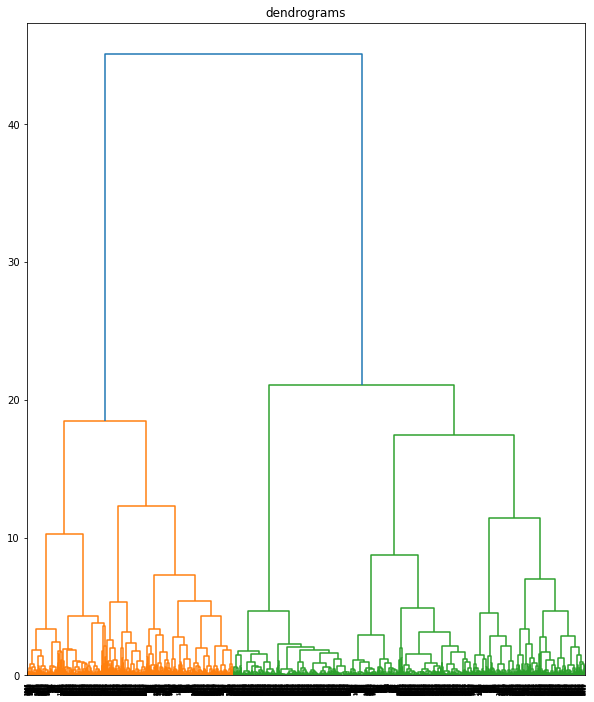

In [8]:
plt.figure(figsize=(10,12))
plt.title("dendrograms")
dend=sch.dendrogram(sch.linkage(df_norm,method='ward'))

In [9]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete').fit(df_norm)
cluster=pd.Series(hc.labels_)
cluster
EW['Cluster']=cluster
EW.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [10]:
EW.iloc[:,1:].groupby('Cluster').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,90920.413174,176.971771,2.994867,1.005988,1.021386,33532.760479,16.643285,772.680924,2.332763,4151.118905,1.000000
1,59971.432010,88.480947,1.712395,1.000401,1.008825,10215.097473,9.096270,227.057361,0.653028,3823.422383,0.000000
2,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
3,55387.685714,28.571429,1.028571,2.428571,1.000000,14254.571429,16.342857,398.657143,1.771429,4139.228571,0.285714
4,121041.607383,491.486577,1.409396,1.000000,1.006711,10519.322148,11.456376,928.362416,2.949664,6483.204698,1.000000


###### K-means

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_EW_df = scaler.fit_transform(EW.iloc[:,1:])

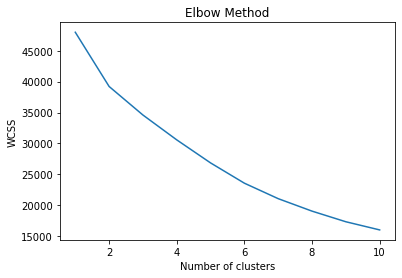

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_EW_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_EW_df)

KMeans(n_clusters=5, random_state=42)

In [15]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [16]:
#Assign clusters to the data set
EW['clusterid_new'] = clusters_new.labels_

In [17]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 1.34213881,  0.69179729,  0.26722734,  0.12026162, -0.06276658,
         0.84337596,  1.94618162,  4.05970002,  4.27960381,  0.2527826 ,
         0.93651151, -0.20009056],
       [-0.29625992, -0.06566172, -0.57545983, -0.08974301, -0.06062416,
        -0.51242909, -0.4750096 , -0.18976933, -0.20436613, -0.2884906 ,
        -0.48110735, -0.08791015],
       [ 0.25869799,  0.33455036, -0.49003685,  0.94878281, -0.06276658,
        -0.27449848, -0.04756937,  0.14291072,  0.18512319,  1.01056255,
         1.1406029 ,  2.93556957],
       [ 0.39091077, -0.02914207,  1.28715163, -0.08648215, -0.05387331,
         1.0069097 ,  0.76717163, -0.08287015, -0.08820394,  0.29035553,
         0.57948457, -0.60097167],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735, -0.2167867 ]])

In [18]:
EW.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1802.653226,208839.346774,679.266129,2.427419,1.032258,1.000000,37510.645161,30.290323,6143.774194,17.604839,4640.524194,0.822581,0.750000
1,1,2338.089084,43749.270180,93.320786,1.267252,1.001255,1.000418,4770.735257,7.040569,194.372229,0.598494,3522.861982,0.138018,0.861982
2,2,850.249211,99668.529968,402.911672,1.384858,1.154574,1.000000,10516.271293,11.145110,660.135647,2.075710,6205.246057,0.921136,3.880126
3,3,1691.719618,112990.694444,121.571181,3.831597,1.001736,1.001736,41459.649306,18.968750,344.034722,1.039062,4718.107639,0.650174,0.349826
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.733333


In [19]:
EW.iloc[:,1:].groupby('clusterid_new').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
clusterid_new,,,,,,,,,,,,
0,208839.346774,679.266129,2.427419,1.032258,1.000000,37510.645161,30.290323,6143.774194,17.604839,4640.524194,0.822581,0.750000
1,43749.270180,93.320786,1.267252,1.001255,1.000418,4770.735257,7.040569,194.372229,0.598494,3522.861982,0.138018,0.861982
2,99668.529968,402.911672,1.384858,1.154574,1.000000,10516.271293,11.145110,660.135647,2.075710,6205.246057,0.921136,3.880126
3,112990.694444,121.571181,3.831597,1.001736,1.001736,41459.649306,18.968750,344.034722,1.039062,4718.107639,0.650174,0.349826
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.733333


In [20]:
EW

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1


###### DBSCAN

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(scaled_EW_df)

DBSCAN(eps=0.8, min_samples=6)

In [23]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [24]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_DBscan'])

In [25]:
cl

,cluster_DBscan
0,0
1,0
2,0
3,0
4,-1
...,...
3994,2
3995,2
3996,2
3997,0


In [26]:
pd.concat([EW,cl],axis=1)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,clusterid_new,cluster_DBscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1,0
